# Pymaceuticals Inc.
---

### Analysis

-When looking at the bar graphs, it is easy to see that there are two drugs, Capomulin and Ramicane, have more observed timepoints compared to the placebo and any other drug in the trial.

-We can most likely conclude that this means the mice on these drugs, lived longer than those on the other drugs and/or the placebo.

-The pie graph just shows that the sex of the mice had little effect on the data since they were close to even distribution.

-The box plots shows that again, Capolumin and Ramicane, were more effective than other drugs by showing that the final tumor volume was much smaller in those mice than compared to the other drugs. The boxes and wiskers were also more compact, proving that treatment had higher success rates.

-The fact that there was minimal outliers, shows that the methodology and results of the study were consistent and reliable.

The line graph singles out one mouse in order to see tumor volume progression of Capomulin, a drug that seems to be more effective than others. The line shows that the tumor volume decrease as time increases. This also proves it effectiveness as a drug treatment. Of course further studies would be needed to show just how effective this drug regimen could be.

-The scatter plot shows, that the heavier the mouse, the less effective the drug regimens seem to be. This can be confirmed by looking at the strong correlation value of 0.84.



 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
mice= data_complete["Mouse ID"].value_counts()
mice_count = len(mice)
mice_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_info = data_complete.loc[data_complete["Mouse ID"] == "g989", :]
duplicate_mice_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_complete[data_complete["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
mice2= clean_df["Mouse ID"].value_counts()
clean_mice_count = len(mice2)
clean_mice_count

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Groupby drug regimen
drug_df = clean_df.groupby("Drug Regimen")

#Calculate mean, median, variance, standard deviation and SEM for each drug
mean_tumor_volume = drug_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_df["Tumor Volume (mm3)"].var()
std_tumor_volume = drug_df["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_df["Tumor Volume (mm3)"].sem()

#Create a DataFrame to summarize the calculations
drug_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                               "Median Tumor Volume": median_tumor_volume,
                               "Tumor Volume Variance": variance_tumor_volume,
                               "Tumor Volume Std. Dev.": std_tumor_volume,
                               "Tumor Volume Std. Err.": sem_tumor_volume})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

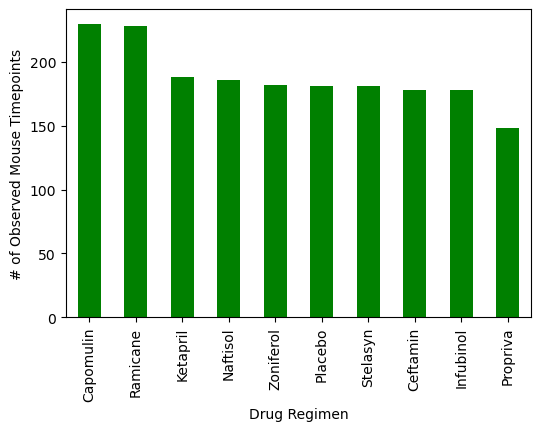

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_graph_pand = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()

bar_graph_pand.sort_values(ascending=False).plot.bar(figsize=(6,4),color="green",
                                                     xlabel="Drug Regimen",
                                                     ylabel="# of Observed Mouse Timepoints")
plt.savefig("Images/timepoints_vs_drug_pandas.png")
plt.show()

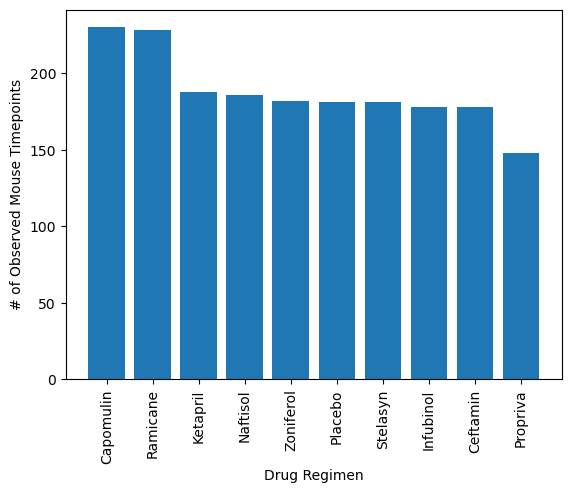

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#calculate x, y, and ticks
treatment_counts = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(treatment_counts))

tick_locations = [value for value in x_axis]

#set labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#plot bar graph
plt.bar(x_axis, treatment_counts)
plt.xticks(tick_locations, treatment_counts.index.values, rotation=90)
plt.savefig("Images/timepoints_vs_drug_pyplot.png")
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


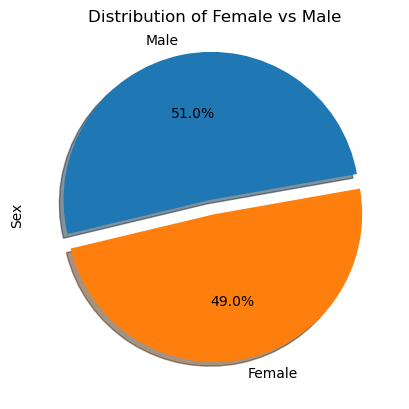

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvm_pand = clean_df["Sex"].value_counts()
print(fvm_pand)

fvm_pand.plot(kind="pie", autopct="%1.1f%%", startangle=10, shadow=True, explode=(0.1,0))
plt.title("Distribution of Female vs Male")
plt.savefig("Images/fvm_pandas.png")

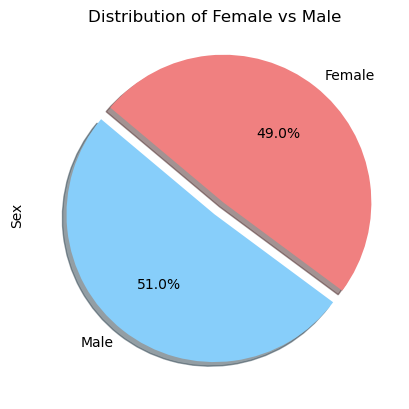

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sizes taken from previous example printout
#set parameters with some visual variety from previous example
sizes = [958, 922]
labels = "Male", "Female"
explode = (0,0.1)
colors = ["lightskyblue", "lightcoral" ]

#plot graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 140)
plt.title("Distribution of Female vs Male")
plt.ylabel("Sex")
plt.savefig("Images/fvm_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint hence right merge
merged_df = pd.merge(clean_df, max_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Create loop
for drug in drugs:
    
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    values= drug_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(values)
                               
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Determine outliers using upper and lower bounds    
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    print(f"The IQR for {drug} is {iqr:.2f}")
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The Lower Bound for {drug} is {lower_bound:.2f}")
    print(f"The Upper Bound for {drug} is {upper_bound:.2f}")
    
    outliers = ((values >= upper_bound) | (values <= lower_bound))
    outliers_count = outliers.sum()
    print(f"Number of {drug} outliers: {outliers_count}")
    print(f"--------------------------------------------")


The IQR for Capomulin is 7.78
The Lower Bound for Capomulin is 20.70
The Upper Bound for Capomulin is 51.83
Number of Capomulin outliers: 0
--------------------------------------------
The IQR for Ramicane is 9.10
The Lower Bound for Ramicane is 17.91
The Upper Bound for Ramicane is 54.31
Number of Ramicane outliers: 0
--------------------------------------------
The IQR for Infubinol is 11.48
The Lower Bound for Infubinol is 36.83
The Upper Bound for Infubinol is 82.74
Number of Infubinol outliers: 1
--------------------------------------------
The IQR for Ceftamin is 15.58
The Lower Bound for Ceftamin is 25.36
The Upper Bound for Ceftamin is 87.67
Number of Ceftamin outliers: 0
--------------------------------------------


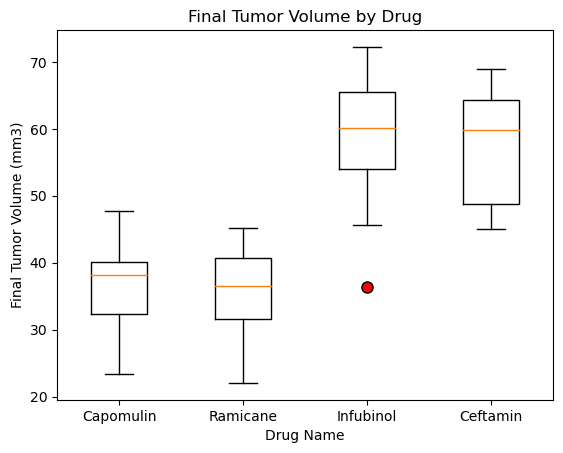

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_marker = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumor_vol_data, labels=drugs, flierprops=outlier_marker)
plt.title("Final Tumor Volume by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Final Tumor Volume (mm3)")
plt.savefig("Images/boxplot.png")
plt.show()


## Line and Scatter Plots

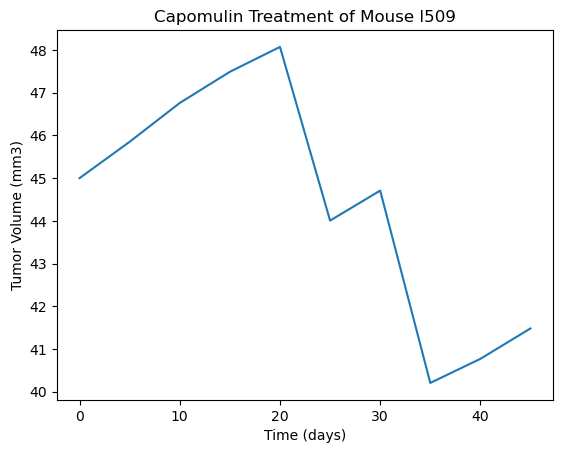

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_info = clean_df.loc[clean_df["Mouse ID"] =="l509"]

#plot line graph of Tumor volume vs time
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"])

#Add labels to graph 
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/linegraph_single_mouse.png")
plt.show()

C:\Users\snbad\AppData\Local\Temp\ipykernel_8396\2920966513.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = capomulin_df.groupby(["Mouse ID"]).mean()


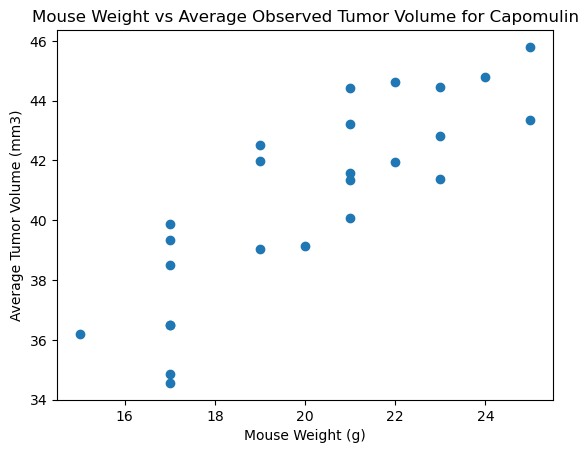

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_df = capomulin_df.groupby(["Mouse ID"]).mean()

#set x and y
x_values = avg_df["Weight (g)"]
y_values = avg_df["Tumor Volume (mm3)"]

#plot graph and set labels
plt.scatter(x_values, y_values)
plt.title("Mouse Weight vs Average Observed Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Images/scatter.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
y=0.95x +21.55


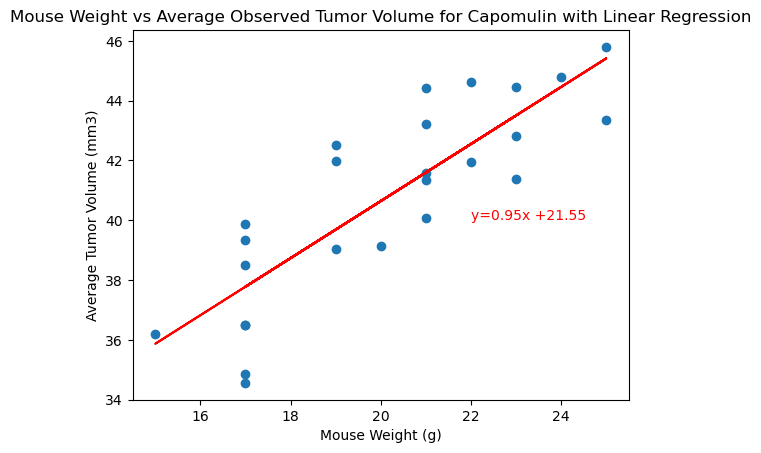

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

#calculate x and y
x_values = avg_df["Weight (g)"]
y_values = avg_df["Tumor Volume (mm3)"]

# calulate line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#plot graph and set labels
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Mouse Weight vs Average Observed Tumor Volume for Capomulin with Linear Regression")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(22,40), color="red")
plt.savefig("Images/scatter_line_regression.png")
plt.show()